In [1]:
#Code Reference : https://github.com/mrunmayi96/Link-Prediction-in-Social-Networks
%matplotlib inline

import pickle
import seaborn as sns
import copy
import time
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.metrics import classification_report, confusion_matrix,roc_curve, auc

In [2]:
df = pd.read_csv('twitch_final_dataset.csv')
df = df.drop(columns=['Unnamed: 0'])
df.head(5)

,Source,Destination,Class,Page_Rank_Src,Page_Rank_Dst,Shortest_Path,Follows_Back,Followers_Src,Followees_Src,Followers_Dst,Followees_Dst,Int_Followers,Int_Followees
0,6194,255,1,0.000011,0.000018,-1,0,0,5,0,4,0,0
1,6194,980,1,0.000011,0.000013,12,0,0,5,1,16,0,1
2,6194,2992,1,0.000011,0.000015,4,0,0,5,3,0,0,0
3,6194,2507,1,0.000011,0.000047,2,0,0,5,8,14,0,0
4,6194,986,1,0.000011,0.000014,10,0,0,5,2,21,0,0


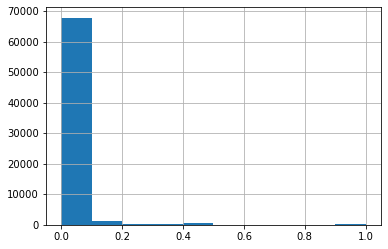

In [3]:
x = df['Page_Rank_Src']
df['Page_Rank_Src'] = ( x-x.min()) / ( x.max() - x.min() )
df['Page_Rank_Src'].hist()

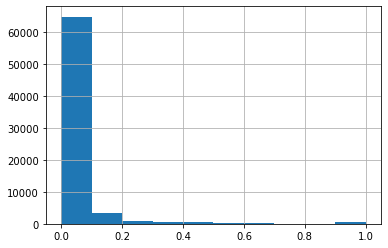

In [4]:
x = df['Page_Rank_Dst']
df['Page_Rank_Dst'] = ( x-x.min()) / ( x.max() - x.min() )
df['Page_Rank_Dst'].hist()

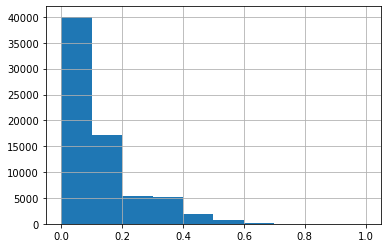

In [5]:
x = df['Shortest_Path']
df['Shortest_Path'] = ( x-x.min()) / ( x.max() - x.min() )
df['Shortest_Path'].hist()

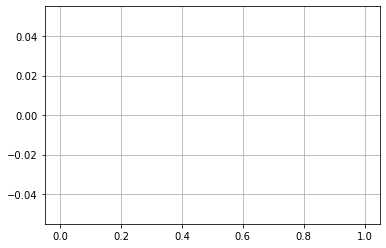

In [6]:
x = df['Follows_Back']
df['Follows_Back'] = ( x-x.min()) / ( x.max() - x.min() )
df['Follows_Back'].hist()

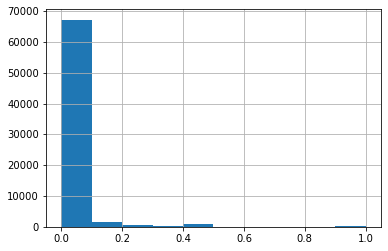

In [7]:
x = df['Followees_Dst']
df['Followees_Dst'] = ( x-x.min()) / ( x.max() - x.min() )
df['Followees_Dst'].hist()

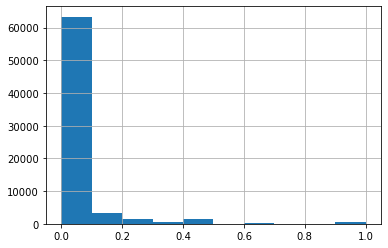

In [8]:
x = df['Followees_Src']
df['Followees_Src'] = ( x-x.min()) / ( x.max() - x.min() )
df['Followees_Src'].hist()

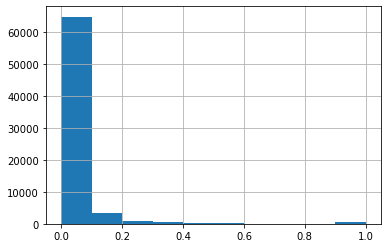

In [9]:
x = df['Followers_Dst']
df['Followers_Dst'] = ( x-x.min()) / ( x.max() - x.min() )
df['Followers_Dst'].hist()

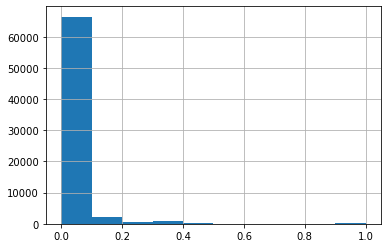

In [10]:
x = df['Followers_Src']
df['Followers_Src'] = ( x-x.min()) / ( x.max() - x.min() )
df['Followers_Src'].hist()

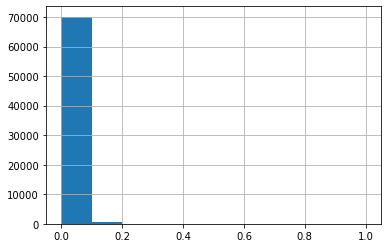

In [11]:
x = df['Int_Followees']
df['Int_Followees'] = ( x-x.min()) / ( x.max() - x.min() )
df['Int_Followees'].hist()

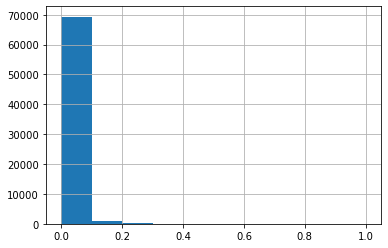

In [12]:
x = df['Int_Followers']
df['Int_Followers'] = ( x-x.min()) / ( x.max() - x.min() )
df['Int_Followers'].hist()

In [14]:
df = df.drop(columns=['Follows_Back'])

In [15]:
df.head(5)

,Source,Destination,Class,Page_Rank_Src,Page_Rank_Dst,Shortest_Path,Followers_Src,Followees_Src,Followers_Dst,Followees_Dst,Int_Followers,Int_Followees
0,6194,255,1,0.0,0.003192,0.000000,0.0,0.011287,0.000000,0.009029,0.0,0.000000
1,6194,980,1,0.0,0.001034,0.590909,0.0,0.011287,0.002415,0.036117,0.0,0.013158
2,6194,2992,1,0.0,0.001979,0.227273,0.0,0.011287,0.007246,0.000000,0.0,0.000000
3,6194,2507,1,0.0,0.016213,0.136364,0.0,0.011287,0.019324,0.031603,0.0,0.000000
4,6194,986,1,0.0,0.001616,0.500000,0.0,0.011287,0.004831,0.047404,0.0,0.000000


In [16]:
df.to_csv('twitch_preprocessed_data.csv')

In [17]:
g = nx.from_pandas_edgelist(df[['Source','Destination']], source='Source', target='Destination',create_using=nx.DiGraph())
print(nx.info(g))

Name: 
Type: DiGraph
Number of nodes: 39558
Number of edges: 70648
Average in degree:   1.7859
Average out degree:   1.7859


In [18]:
df_x = df.drop(columns=['Source', 'Destination', 'Class'])
df_y = df[['Class']]
x_train, x_test, y_train, y_test  = train_test_split(df_x, df_y, test_size = 0.3, random_state=7)

In [19]:
def plot_roc(y_test, y_pred):
    fpr,tpr,ths = roc_curve(y_test, y_pred)
    auc_ = auc(fpr, tpr)
    plt.plot(fpr, tpr, color='tab:blue',label='ROC curve (area = %0.2f)' % auc_)
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.title('ROC Plot')
    plt.legend()
    plt.show()

In [20]:
def plot_confusion(y_test, y_pred):
    
    C = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(3,3))
    sns.heatmap(C, annot=True, fmt='g')   
    labels = [0,1]
    cmap=sns.light_palette("tab:blue")
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Confusion matrix")
    plt.show()

In [21]:
#Logistic Regression
start = time.time()
lr = LogisticRegression(C=2,solver='liblinear', random_state=0).fit(x_train, y_train)
end = time.time()
print('Time taken to train model : ', round(end-start,2) , ' seconds')

Time taken to train model :  0.18  seconds


In [22]:
print(classification_report(lr.predict(x_test), y_test))

              precision    recall  f1-score   support

           0       0.98      0.91      0.95     11319
           1       0.91      0.98      0.94      9876

    accuracy                           0.94     21195
   macro avg       0.94      0.95      0.94     21195
weighted avg       0.95      0.94      0.94     21195



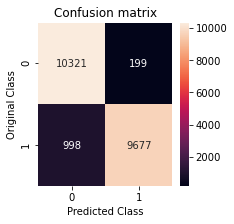

In [23]:
plot_confusion(y_test, lr.predict(x_test)) 

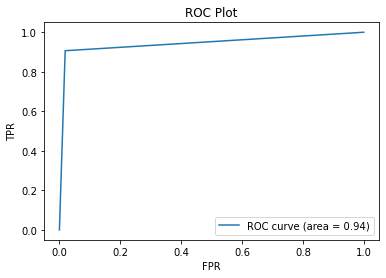

In [24]:
plot_roc(y_test, lr.predict(x_test))

In [25]:
#Random Forest

In [26]:
start = time.time()
from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier(n_estimators=50,max_depth=9)

#Train the model using the training sets y_pred=clf.predict(X_test)
rf.fit(x_train,y_train)
end = time.time()
print('Time taken to train model : ', round(end-start,2) , ' seconds')

Time taken to train model :  3.54  seconds


In [27]:
y_pred=rf.predict(x_test)
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.98      0.95      0.97     10807
           1       0.95      0.98      0.97     10388

    accuracy                           0.97     21195
   macro avg       0.97      0.97      0.97     21195
weighted avg       0.97      0.97      0.97     21195



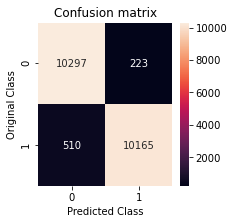

In [28]:
plot_confusion(y_test,y_pred) 

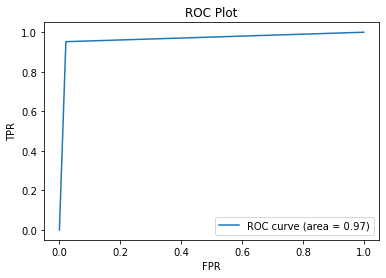

In [29]:
plot_roc(y_test, y_pred)

In [30]:
start = time.time()
from sklearn import svm
#Create a svm Classifier
sv = svm.SVC(kernel='linear') # Linear Kernel
#Train the model using the training sets
sv.fit(x_train, y_train)
end = time.time()
print('Time taken to train model : ', round(end-start,2) , ' seconds')

Time taken to train model :  16.48  seconds


In [31]:
y_pred=sv.predict(x_test)
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.98      0.91      0.95     11340
           1       0.91      0.98      0.94      9855

    accuracy                           0.94     21195
   macro avg       0.94      0.95      0.94     21195
weighted avg       0.95      0.94      0.94     21195



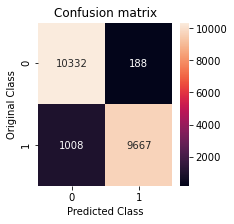

In [32]:
plot_confusion(y_test,y_pred) 

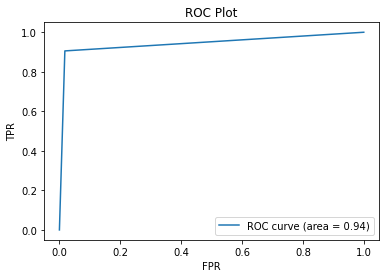

In [33]:
plot_roc(y_test, y_pred)